## Projet de DataMining Machine Learning

### Objectif : Mettre en place un modèle de Machine Learning capable de prédire les départ des clients.

## Etapes :
### 1) Importation des librairies
### 2) Chargement et comprehension du dataset
### 3) Pretraitement de données
### 4) Modelisation - FeatureSelection - Optimisation - Evaluation

--------------------------------------------------------------------------------------------------------------------------------

## 1) Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFECV
from pickle import dump

## 2) Chargement et compéhension du jeu de données

In [2]:
# Chargement des données
data = pd.read_csv('Dataset.csv', sep=';', na_values='Unknown')

In [3]:
# Copie de notre jeu de données
df = data.copy()
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
# Dimensions de notre jeu de données
df.shape

(10127, 21)

In [5]:
# Information sur les dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           9015 non-null   object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
# Suppression de la variable CLIENTNUM
df=df.drop('CLIENTNUM', axis=1)

In [7]:
# Variable quantitative
variables_quanti=df.select_dtypes(include=np.number).columns
variables_quanti

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [8]:
# Nombre de variables quantitatives
variables_quanti.size

14

In [9]:
# Description des variables quantitatives
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [10]:
# Liste des variables qualitatives
variables_quali=df.select_dtypes('object').columns
variables_quali

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [11]:
# Nombre de variables qualitatives
variables_quali.size

6

In [12]:
for col in variables_quali:
    print(f'{col :-<60} { df[col].unique()}')

Attrition_Flag---------------------------------------------- ['Existing Customer' 'Attrited Customer']
Gender------------------------------------------------------ ['M' 'F']
Education_Level--------------------------------------------- ['High School' 'Graduate' 'Uneducated' nan 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status---------------------------------------------- ['Married' 'Single' nan 'Divorced']
Income_Category--------------------------------------------- ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +' nan]
Card_Category----------------------------------------------- ['Blue' 'Gold' 'Silver' 'Platinum']


## Analyse univarié

### Visualisation des variables qualitatives

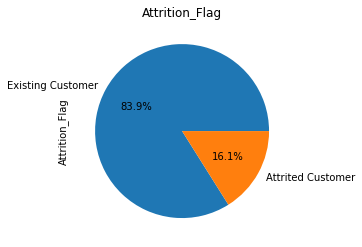

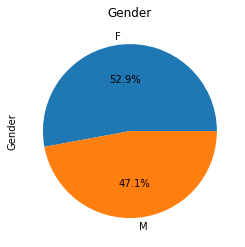

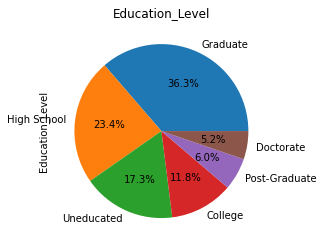

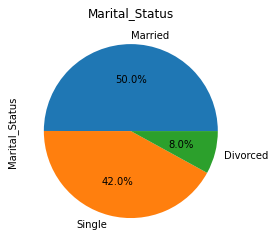

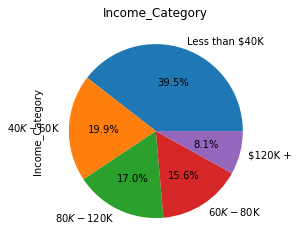

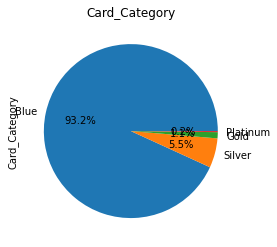

In [13]:
for col in variables_quali:
        plt.figure()
        df[col].value_counts().plot.pie(autopct='%1.1f%%')
        plt.title(col)
        plt.show()

### Visualisation des variables quantitatives

In [14]:
#df.hist(figsize=(18,13),column = variables_quanti)
#plt.show()

In [15]:
# for col in colonne_quanti:
#     plt.figure(figsize=(3,3))
#     sbn.boxplot(y=df[col])

## 3) Pretraitement de données

### Analyse des valeurs manquantes

In [16]:
# Analyse des valeurs manquantes
((df.isna().sum()/df.shape[0])*100).sort_values(ascending=False)

Education_Level             14.999506
Income_Category             10.980547
Marital_Status               7.396070
Avg_Utilization_Ratio        0.000000
Total_Ct_Chng_Q4_Q1          0.000000
Customer_Age                 0.000000
Gender                       0.000000
Dependent_count              0.000000
Card_Category                0.000000
Months_on_book               0.000000
Total_Relationship_Count     0.000000
Months_Inactive_12_mon       0.000000
Contacts_Count_12_mon        0.000000
Credit_Limit                 0.000000
Total_Revolving_Bal          0.000000
Avg_Open_To_Buy              0.000000
Total_Amt_Chng_Q4_Q1         0.000000
Total_Trans_Amt              0.000000
Total_Trans_Ct               0.000000
Attrition_Flag               0.000000
dtype: float64

In [17]:
# Suppression des valeurs manquantes
df=df.dropna(axis=0)

In [18]:
# Analyse des valeurs manquantes
((df.isna().sum()/df.shape[0])*100).sort_values(ascending=False)

Avg_Utilization_Ratio       0.0
Total_Ct_Chng_Q4_Q1         0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Attrition_Flag              0.0
dtype: float64

### Subdivision du dataset

In [19]:
# Division du Dataset en donnée de test et en données d'entrainement
trainset, testset= train_test_split(df, test_size=0.3, random_state=3)

In [20]:
testset['Attrition_Flag'].value_counts()

Existing Customer    1778
Attrited Customer     347
Name: Attrition_Flag, dtype: int64

In [21]:
# Données d'entrainement et de test ordi
df_train_ordi=trainset[variables_quali.drop(['Gender', 'Marital_Status'])]
df_test_ordi=testset[variables_quali.drop(['Gender', 'Marital_Status'])]

# Données d'entrainement et de test nomi
df_train_nomi=trainset[['Gender', 'Marital_Status']]
df_test_nomi=testset[['Gender', 'Marital_Status']]
df_test_ordi

,Attrition_Flag,Education_Level,Income_Category,Card_Category
9888,Attrited Customer,High School,$80K - $120K,Blue
1908,Existing Customer,High School,Less than $40K,Blue
7540,Existing Customer,Graduate,Less than $40K,Blue
9439,Existing Customer,College,$80K - $120K,Blue
3671,Existing Customer,High School,$40K - $60K,Blue
...,...,...,...,...
3336,Existing Customer,Graduate,$60K - $80K,Blue
9361,Existing Customer,High School,$40K - $60K,Blue
2033,Existing Customer,Graduate,$40K - $60K,Blue
9060,Existing Customer,Uneducated,$80K - $120K,Blue


##  Encodage des variables qualitatives

In [22]:
# Encodage des variables ordinales 
def encodage(df, dicto):
    
    for col in df.columns:
        df[col]=df[col].map(dicto)
        
    return df

In [23]:
# Encodage des variables nominales
def encodage_nomi(df):
    return pd.get_dummies(df)
    

#### Encodage des variables qualitatives ordinales

In [24]:
# Card_Category, Income_Category, Education_Level, Attrition Flag
Dicto={
    'Existing Customer':0,
    'Attrited Customer':1,
    
    'Blue':0,
    'Silver':1,
    'Gold':2,
    'Platinum':3,
    
    'Less than $40K':0,
    '$40K - $60K':1,
    '$60K - $80K':2,
    '$80K - $120K':3,
    '$120K +':4,
    
    'Uneducated':0,
    'High School':1,
    'College':2,
    'Graduate':3,
    'Post-Graduate':4,
    'Doctorate':5
    
   
}

In [25]:
# Encodage des variables ordinales du trainset
encodage(df_train_ordi, Dicto)

,Attrition_Flag,Education_Level,Income_Category,Card_Category
228,0,3,0,0
5965,0,0,4,0
1624,0,2,3,0
2674,0,1,2,0
7070,1,3,4,0
...,...,...,...,...
1299,0,0,0,0
2212,0,2,0,0
4567,1,3,0,0
2240,0,1,0,0


In [26]:
# Encodage des variables ordinales du testset
encodage(df_test_ordi, Dicto)

,Attrition_Flag,Education_Level,Income_Category,Card_Category
9888,1,1,3,0
1908,0,1,0,0
7540,0,3,0,0
9439,0,2,3,0
3671,0,1,1,0
...,...,...,...,...
3336,0,3,2,0
9361,0,1,1,0
2033,0,3,1,0
9060,0,0,3,0


#### Encodage des varibles qualitatives nominales

In [27]:
# Encodage des variables nominales du trainset
df_train_nomi=encodage_nomi(df_train_nomi)
df_train_nomi

,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
228,1,0,0,1,0
5965,0,1,1,0,0
1624,0,1,0,0,1
2674,0,1,1,0,0
7070,0,1,0,1,0
...,...,...,...,...,...
1299,0,1,0,1,0
2212,1,0,0,0,1
4567,1,0,0,1,0
2240,1,0,0,1,0


In [28]:
# Encodage des variables nominales du testset
df_test_nomi=encodage_nomi(df_test_nomi)
df_test_nomi

,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
9888,0,1,0,1,0
1908,0,1,0,0,1
7540,1,0,0,1,0
9439,0,1,0,1,0
3671,1,0,0,0,1
...,...,...,...,...,...
3336,0,1,0,0,1
9361,0,1,0,1,0
2033,0,1,0,1,0
9060,0,1,0,0,1


#### Concatenation 

In [29]:
trainset=pd.concat([df_train_nomi,df_train_ordi, trainset[variables_quanti]], axis=1)
trainset

,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Attrition_Flag,Education_Level,Income_Category,Card_Category,Customer_Age,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
228,1,0,0,1,0,0,3,0,0,51,...,1,3,3106.0,1304,1802.0,0.604,1368,38,0.407,0.420
5965,0,1,1,0,0,0,0,4,0,44,...,2,3,11362.0,0,11362.0,0.668,3197,61,0.564,0.000
1624,0,1,0,0,1,0,2,3,0,39,...,3,2,4061.0,1775,2286.0,0.686,1602,40,0.667,0.437
2674,0,1,1,0,0,0,1,2,0,32,...,1,4,2239.0,1338,901.0,0.567,2466,60,0.579,0.598
7070,0,1,0,1,0,1,3,4,0,40,...,3,2,2269.0,0,2269.0,0.572,2108,39,0.560,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,0,1,0,1,0,0,0,0,0,60,...,2,4,2094.0,1560,534.0,0.537,1969,41,0.367,0.745
2212,1,0,0,0,1,0,2,0,0,40,...,1,2,7291.0,2517,4774.0,0.830,2198,56,0.697,0.345
4567,1,0,0,1,0,1,3,0,0,51,...,4,3,2016.0,395,1621.0,0.711,2473,44,0.571,0.196
2240,1,0,0,1,0,0,1,0,0,57,...,1,1,5184.0,1856,3328.0,0.553,1834,55,0.571,0.358


In [30]:
testset=pd.concat([df_test_nomi,df_test_ordi, testset[variables_quanti]], axis=1)
testset

,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Attrition_Flag,Education_Level,Income_Category,Card_Category,Customer_Age,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9888,0,1,0,1,0,1,1,3,0,51,...,4,3,4041.0,0,4041.0,0.670,8219,84,0.909,0.000
1908,0,1,0,0,1,0,1,0,0,26,...,1,4,1775.0,1162,613.0,0.930,2169,43,0.536,0.655
7540,1,0,0,1,0,0,3,0,0,53,...,4,0,3319.0,913,2406.0,0.612,4560,84,1.049,0.275
9439,0,1,0,1,0,0,2,3,0,41,...,1,3,34516.0,1617,32899.0,0.625,13083,93,0.722,0.047
3671,1,0,0,0,1,0,1,1,0,43,...,3,3,2297.0,1044,1253.0,0.591,3161,65,0.711,0.455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3336,0,1,0,0,1,0,3,2,0,63,...,1,4,2466.0,0,2466.0,1.077,4059,66,0.650,0.000
9361,0,1,0,1,0,0,1,1,0,43,...,2,2,7139.0,1512,5627.0,1.106,14802,112,0.750,0.212
2033,0,1,0,1,0,0,3,1,0,32,...,3,3,6407.0,963,5444.0,1.052,1921,43,0.720,0.150
9060,0,1,0,0,1,0,0,3,0,58,...,3,1,5182.0,1459,3723.0,0.720,7960,112,0.697,0.282


### Creation des features et des targets

In [31]:
# Fonction pour diviser mon trainset et mon testset en Xtrain, ytrain et Xtest, ytest
def train_test(df):

    X=df.drop('Attrition_Flag', axis=1)
    y=df['Attrition_Flag']
    
    return X, y

In [32]:
X_train, y_train=train_test(trainset)

In [33]:
y_train.value_counts()

0    4190
1     766
Name: Attrition_Flag, dtype: int64

In [34]:
X_test, y_test = train_test(testset)
y_test.value_counts()

0    1778
1     347
Name: Attrition_Flag, dtype: int64

## 4) Modelisation - FeatureSelection - Evaluation

In [35]:
# Les différents estimateurs
model_1 = KNeighborsClassifier()
model_2 = LogisticRegression(solver='liblinear', random_state=0)
model_3 = RandomForestClassifier(random_state=0)

In [36]:
# entrainement de chaque modèle et performance de chaque modèle
for model in (model_1, model_2,  model_3):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

KNeighborsClassifier 0.8847058823529412
LogisticRegression 0.8898823529411765
RandomForestClassifier 0.9581176470588235


Choix du modèle Random Forest pour ma classification.

##  Evaluation du modèle

In [37]:
def evaluation(model):
    
    y_pred=model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test,y_pred))

In [38]:
evaluation(model_3)

[[1760   18]
 [  71  276]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1778
           1       0.94      0.80      0.86       347

    accuracy                           0.96      2125
   macro avg       0.95      0.89      0.92      2125
weighted avg       0.96      0.96      0.96      2125



### Courbe de validation

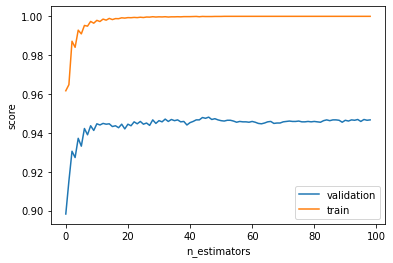

In [39]:
k = np.arange(1,100)
train_score, val_score = validation_curve(RandomForestClassifier(random_state=0), X_train, y_train, 'n_estimators', k, cv=5)

plt.plot(val_score.mean(axis=1), label='validation')
plt.plot(train_score.mean(axis=1), label='train')

plt.xlabel('n_estimators')
plt.ylabel('score')
plt.legend()

Ici je cherche à voir quel est le score que j'obtiens à l'entrainement et à la validation à chaque fois que le paramètre "nombre d'estimateurs" augmente.

## Features Selection

In [40]:
# Utilisation de la fonction RFECV
selector = RFECV(RandomForestClassifier(n_estimators=100,random_state=0), step=1, min_features_to_select=7, cv=5)
selector.fit(X_train, y_train)
print(selector.ranking_)
print(selector.grid_scores_)

[12 10 14  9 11  7  8 13  1  6  4  1  5  3  1  1  2  1  1  1  1  1]
[0.95177668 0.95419766 0.95621501 0.95399564 0.95439947 0.95379504
 0.9519787  0.95218051 0.95218072 0.95318919 0.95016255 0.94975831
 0.94975933 0.94673167 0.9469343  0.94552159]


RFECV (Recursive Feature Elimination) permet de faire la selection de variables pertinentes pour le modèle par elimination de variables moins pertinentes et cela de façon recursive. Il utilise la cross validation. 

In [41]:
# Liste des colonnes selectionnées par RFECV
colonne_selectioner = np.array(X_train.columns)[selector.get_support()]
colonne_selectioner

array(['Customer_Age', 'Total_Relationship_Count', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype=object)

In [42]:
X_train_review, X_test_review = X_train[colonne_selectioner], X_test[colonne_selectioner]
X_test_review

,Customer_Age,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9888,51,2,4041.0,0,0.670,8219,84,0.909,0.000
1908,26,6,1775.0,1162,0.930,2169,43,0.536,0.655
7540,53,6,3319.0,913,0.612,4560,84,1.049,0.275
9439,41,1,34516.0,1617,0.625,13083,93,0.722,0.047
3671,43,4,2297.0,1044,0.591,3161,65,0.711,0.455
...,...,...,...,...,...,...,...,...,...
3336,63,6,2466.0,0,1.077,4059,66,0.650,0.000
9361,43,2,7139.0,1512,1.106,14802,112,0.750,0.212
2033,32,5,6407.0,963,1.052,1921,43,0.720,0.150
9060,58,1,5182.0,1459,0.720,7960,112,0.697,0.282


In [43]:
model_3.fit(X_train_review, y_train)

RandomForestClassifier(random_state=0)

In [44]:
# Enregistrement du model
dump(model_3, open('model.pkl', 'wb'))  

In [44]:
model_3.score(X_test_review, y_test)

0.9623529411764706

In [45]:
y_pred_review=model_3.predict(X_test_review)
print(confusion_matrix(y_test, y_pred_review))
print(classification_report(y_test,y_pred_review))

[[1756   22]
 [  58  289]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1778
           1       0.93      0.83      0.88       347

    accuracy                           0.96      2125
   macro avg       0.95      0.91      0.93      2125
weighted avg       0.96      0.96      0.96      2125



In [1]:
# # Courbe d'apprentissage
# N, train_score, val_score = learning_curve(model_3, X_train_review, y_train,train_sizes=np.linspace(0.1,1.0,10), cv=5)

# plt.plot(N, train_score.mean(axis=1), label='train')
# plt.plot(N, val_score.mean(axis=1), label='validation')
# plt.xlabel('train_size')
# plt.legend()
# plt.show()

In [46]:
param_grid = {
    'n_estimators':np.arange(1,100),
}

grid = GridSearchCV(model_3, param_grid, cv=5)

In [47]:
# Entrainement de notre grille sur les données d'entrainements
grid.fit(X_train_review,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [48]:
# Le meilleur score 
grid.best_score_

0.9560131913023664

In [49]:
# Meilleur paramètre
grid.best_params_

{'n_estimators': 99}

In [50]:
# Souvegarde du modèle
model_valid=grid.best_estimator_

In [51]:
model_valid.score(X_test_review, y_test)

0.9623529411764706

In [52]:
print(confusion_matrix(y_test, model_valid.predict(X_test_review)))
print(classification_report(y_test,model_valid.predict(X_test_review)))

[[1754   24]
 [  56  291]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1778
           1       0.92      0.84      0.88       347

    accuracy                           0.96      2125
   macro avg       0.95      0.91      0.93      2125
weighted avg       0.96      0.96      0.96      2125

